In [1]:
def get_result(file_path):
    results = []
    with open(file_path, 'r') as f:
        data = f.read()
        for line in data.split("\n")[:-1]:
            instance_name = line.split(";")[0].split(":")[0].split("/")[-1].split("inst")[1].split(".")[0]
            runtime = float(line.split(";")[0].split(":")[-1].split("=")[1].split("sec")[0])
            obj_value = int(line.split(";")[1].split("=")[1])
            result = [instance_name, runtime, obj_value]
            if len(line.split(";")) == 3:
                gap = float(line.split(";")[2].split("=")[1].split("%")[0])
                result = [instance_name, runtime, obj_value, gap]
            results.append(result)
    return results

In [2]:
heuristic_results = get_result("log/H/results_H_300_seconds.csv")
heuristic_results

[['Multi_I10_J50_T3_0', 0.0, 34509],
 ['Multi_I10_J50_T3_1', 0.0, 36641],
 ['Multi_I20_J1000_T8_0', 0.19, 731218],
 ['Multi_I20_J1000_T8_1', 0.2, 807798],
 ['Multi_I20_J100_T4_0', 0.01, 68701],
 ['Multi_I20_J100_T4_1', 0.01, 108776],
 ['Multi_I20_J100_T8_0', 0.02, 127679],
 ['Multi_I20_J100_T8_1', 0.02, 116535],
 ['Multi_I20_J250_T4_0', 0.01, 112459],
 ['Multi_I20_J250_T4_1', 0.02, 232129],
 ['Multi_I20_J250_T8_0', 0.05, 235372],
 ['Multi_I20_J250_T8_1', 0.05, 209595],
 ['Multi_I30_J1000_T12_0', 0.54, 1007963],
 ['Multi_I30_J1000_T12_1', 0.59, 1224115],
 ['Multi_I30_J1000_T8_0', 0.23, 716045],
 ['Multi_I30_J1000_T8_1', 0.29, 1181039],
 ['Multi_I30_J250_T12_0', 0.13, 299654],
 ['Multi_I30_J250_T12_1', 0.14, 276580],
 ['Multi_I30_J250_T4_0', 0.02, 266514],
 ['Multi_I30_J250_T4_1', 0.02, 322845],
 ['Multi_I30_J250_T8_0', 0.07, 348154],
 ['Multi_I30_J250_T8_1', 0.07, 360819],
 ['Multi_I30_J500_T12_0', 0.3, 624388],
 ['Multi_I30_J500_T12_1', 0.29, 625574],
 ['Multi_I30_J500_T8_0', 0.11, 395

In [3]:
mip_results = get_result("log/MIP/results_MIP_300_seconds.csv")
mip_results

[['Multi_I10_J50_T3_0', 0.24, 34325, 0.0],
 ['Multi_I10_J50_T3_1', 0.14, 36519, 0.0],
 ['Multi_I20_J1000_T8_0', 269.39, 718670, 0.26],
 ['Multi_I20_J1000_T8_1', 284.8, 797646, 0.7156],
 ['Multi_I20_J100_T4_0', 0.51, 67925, 0.0],
 ['Multi_I20_J100_T4_1', 0.32, 108492, 0.0],
 ['Multi_I20_J100_T8_0', 5.89, 126472, 0.0],
 ['Multi_I20_J100_T8_1', 23.27, 113586, 0.0001],
 ['Multi_I20_J250_T4_0', 50.92, 110531, 0.0],
 ['Multi_I20_J250_T4_1', 2.44, 231099, 0.0001],
 ['Multi_I20_J250_T8_0', 300.02, 229872, 0.3498],
 ['Multi_I20_J250_T8_1', 300.03, 205247, 0.0429],
 ['Multi_I30_J1000_T12_0', 278.87, 1004033, 2.3426],
 ['Multi_I30_J1000_T12_1', 179.72, 1210809, 1.161],
 ['Multi_I30_J1000_T8_0', 265.64, 711226, 2.3899],
 ['Multi_I30_J1000_T8_1', 300.0, 1164861, 0.6358],
 ['Multi_I30_J250_T12_0', 300.03, 310252, 6.3297],
 ['Multi_I30_J250_T12_1', 300.02, 276620, 2.9958],
 ['Multi_I30_J250_T4_0', 9.26, 264690, 0.0],
 ['Multi_I30_J250_T4_1', 7.73, 319936, 0.0001],
 ['Multi_I30_J250_T8_0', 20.31, 3442

In [4]:
import math
def compute_heuristic_gap(heuristic_results, mip_results):
    heuristic_gaps = []
    if len(heuristic_results) != len(mip_results):
        raise Exception("Heuristic and MIP results have different lengths")
    for i in range(len(heuristic_results)):
        obj_h = heuristic_results[i][2]
        obj_m = mip_results[i][2]
        gap_m = mip_results[i][3]
        heuristic_gaps.append(float("{:.4f}".format(((abs(obj_m - obj_h) / obj_h) * 100) + gap_m)))

    for i in range(len(heuristic_gaps)):
        heuristic_results[i].append(heuristic_gaps[i])

compute_heuristic_gap(heuristic_results, mip_results)
heuristic_results

[['Multi_I10_J50_T3_0', 0.0, 34509, 0.5332],
 ['Multi_I10_J50_T3_1', 0.0, 36641, 0.333],
 ['Multi_I20_J1000_T8_0', 0.19, 731218, 1.976],
 ['Multi_I20_J1000_T8_1', 0.2, 807798, 1.9723],
 ['Multi_I20_J100_T4_0', 0.01, 68701, 1.1295],
 ['Multi_I20_J100_T4_1', 0.01, 108776, 0.2611],
 ['Multi_I20_J100_T8_0', 0.02, 127679, 0.9453],
 ['Multi_I20_J100_T8_1', 0.02, 116535, 2.5307],
 ['Multi_I20_J250_T4_0', 0.01, 112459, 1.7144],
 ['Multi_I20_J250_T4_1', 0.02, 232129, 0.4438],
 ['Multi_I20_J250_T8_0', 0.05, 235372, 2.6865],
 ['Multi_I20_J250_T8_1', 0.05, 209595, 2.1174],
 ['Multi_I30_J1000_T12_0', 0.54, 1007963, 2.7325],
 ['Multi_I30_J1000_T12_1', 0.59, 1224115, 2.248],
 ['Multi_I30_J1000_T8_0', 0.23, 716045, 3.0629],
 ['Multi_I30_J1000_T8_1', 0.29, 1181039, 2.0056],
 ['Multi_I30_J250_T12_0', 0.13, 299654, 9.8664],
 ['Multi_I30_J250_T12_1', 0.14, 276580, 3.0103],
 ['Multi_I30_J250_T4_0', 0.02, 266514, 0.6844],
 ['Multi_I30_J250_T4_1', 0.02, 322845, 0.9012],
 ['Multi_I30_J250_T8_0', 0.07, 348154,

In [5]:
# divide the instances into 2 sets, one for the "Single" and one for the "Multi" instances
single_h_results = []
multi_h_results = []
single_mip_results = []
multi_mip_results = []
for result in heuristic_results:
    if "Single" in result[0]:
        single_h_results.append(result)
    else:
        multi_h_results.append(result)

for result in mip_results:
    if "Single" in result[0]:
        single_mip_results.append(result)
    else:
        multi_mip_results.append(result)

In [6]:
single_h_results

[['Single_I10_J50_T3_0', 0.0, 23484, 1.2008],
 ['Single_I10_J50_T3_1', 0.0, 24301, 0.6913],
 ['Single_I20_J1000_T8_0', 0.18, 548961, 5.8013],
 ['Single_I20_J1000_T8_1', 0.17, 529254, 3.5657],
 ['Single_I20_J100_T4_0', 0.01, 45097, 1.3748],
 ['Single_I20_J100_T4_1', 0.0, 44157, 1.6419],
 ['Single_I20_J100_T8_0', 0.02, 81883, 2.1812],
 ['Single_I20_J100_T8_1', 0.02, 80797, 1.8924],
 ['Single_I20_J250_T4_0', 0.01, 87633, 1.7847],
 ['Single_I20_J250_T4_1', 0.01, 90916, 3.0259],
 ['Single_I20_J250_T8_0', 0.04, 161142, 4.4366],
 ['Single_I20_J250_T8_1', 0.04, 156920, 2.7931],
 ['Single_I30_J1000_T12_0', 0.47, 776119, 5.7209],
 ['Single_I30_J1000_T12_1', 0.48, 793688, 128.7386],
 ['Single_I30_J1000_T8_0', 0.21, 535028, 6.9304],
 ['Single_I30_J1000_T8_1', 0.22, 525009, 7.5711],
 ['Single_I30_J250_T12_0', 0.13, 221491, 3.2546],
 ['Single_I30_J250_T12_1', 0.12, 229222, 6.5018],
 ['Single_I30_J250_T4_0', 0.01, 88461, 2.6562],
 ['Single_I30_J250_T4_1', 0.01, 86863, 2.3942],
 ['Single_I30_J250_T8_0

In [7]:
def compute_average(results, index):
    total_time = 0
    for result in results:
        total_time += result[index]
    return total_time / len(results)

single_h_avg_time = compute_average(single_h_results, 1)
single_mip_avg_time = compute_average(single_mip_results, 1)
multi_h_avg_time = compute_average(multi_h_results, 1)
multi_mip_avg_time = compute_average(multi_mip_results, 1)

print("Single Heuristic avg time: ", single_h_avg_time)
print("Single MIP avg time: ", single_mip_avg_time)
print("Multi Heuristic avg time: ", multi_h_avg_time)
print("Multi MIP avg time: ", multi_mip_avg_time)

Single Heuristic avg time:  0.1610526315789474
Single MIP avg time:  228.14947368421053
Multi Heuristic avg time:  0.2047368421052631
Multi MIP avg time:  185.13236842105266


In [8]:
single_h_avg_gap = compute_average(single_h_results, 3)
single_mip_avg_gap = compute_average(single_mip_results, 3)
multi_h_avg_gap = compute_average(multi_h_results, 3)
multi_mip_avg_gap = compute_average(multi_mip_results, 3)
print("Single Heuristic avg gap: ", single_h_avg_gap)
print("Single MIP avg gap: ", single_mip_avg_gap)
print("Multi Heuristic avg gap: ", multi_h_avg_gap)
print("Multi MIP avg gap: ", multi_mip_avg_gap)

Single Heuristic avg gap:  8.48235
Single MIP avg gap:  6.230344736842104
Multi Heuristic avg gap:  2.071481578947369
Multi MIP avg gap:  0.9610368421052629


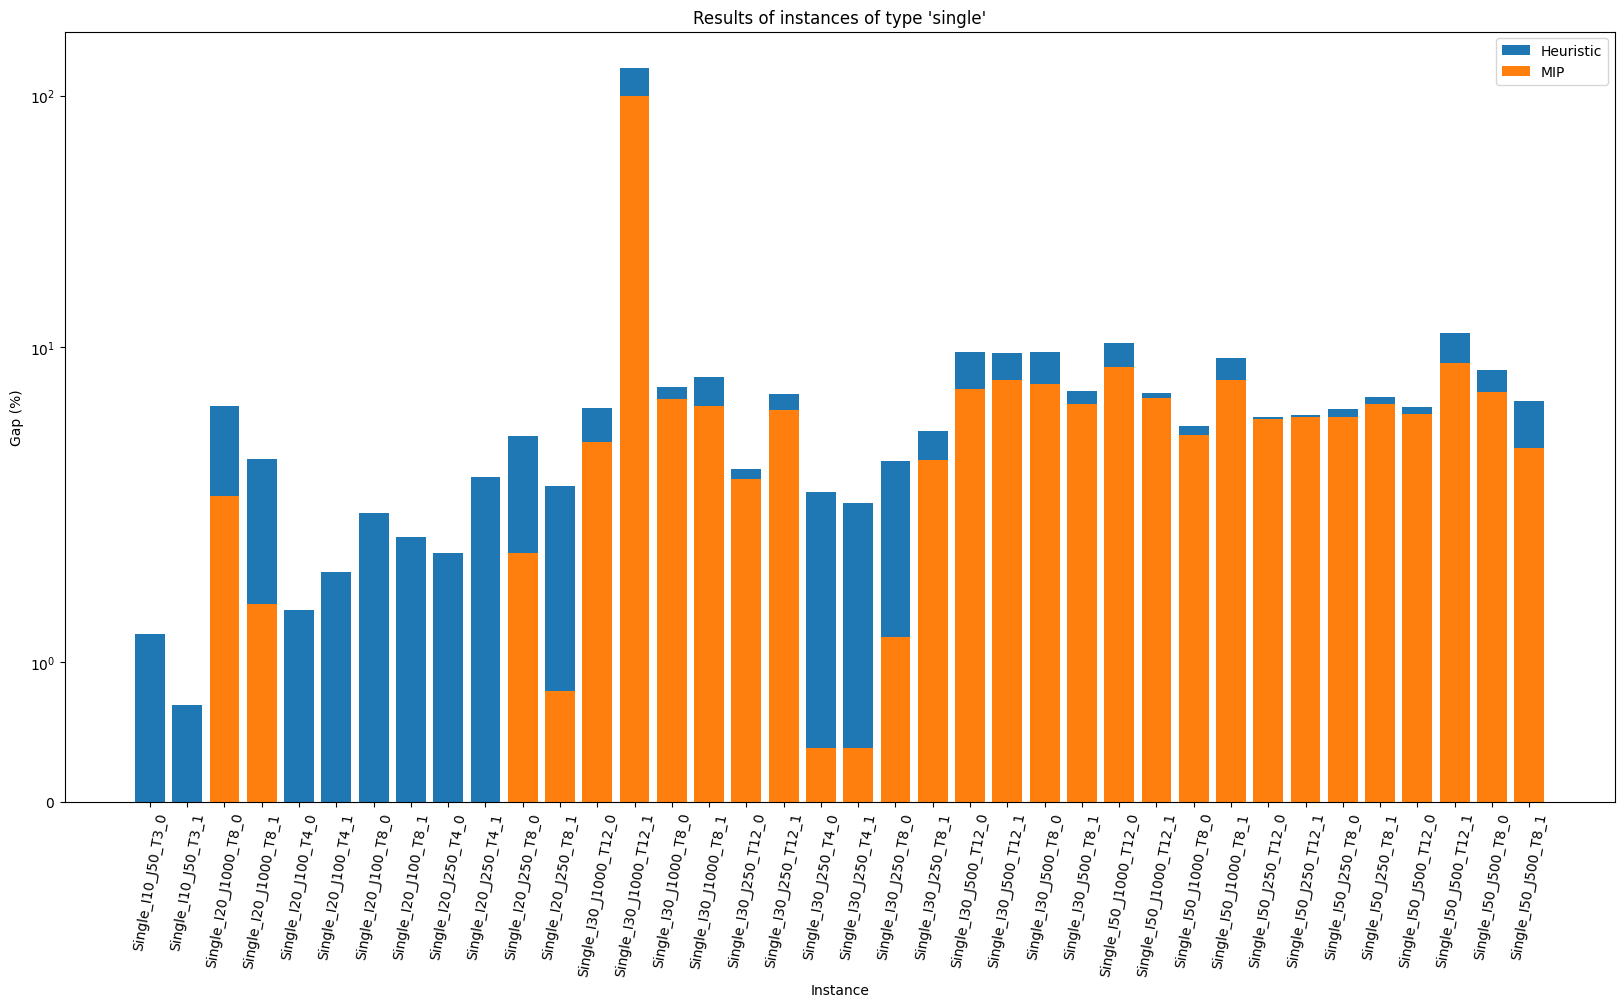

In [9]:
import matplotlib.pyplot as plt

def plot_results(results_1, results_2, title):
    #scatter plot with the name of the instance on the x-axis incline the x-axis labels
    # and the gap on the y-axis
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.bar([result[0] for result in results_1], [result[3] for result in results_1], label="Heuristic")
    ax.bar([result[0] for result in results_2], [result[3] for result in results_2], label="MIP")
    ax.set_title(title)
    ax.set_xlabel("Instance")
    ax.set_yscale("symlog")
    ax.set_ylabel("Gap (%)")
    ax.legend()
    plt.xticks(rotation=80)
    plt.show()

plot_results(single_h_results, single_mip_results, "Results of instances of type 'single'")

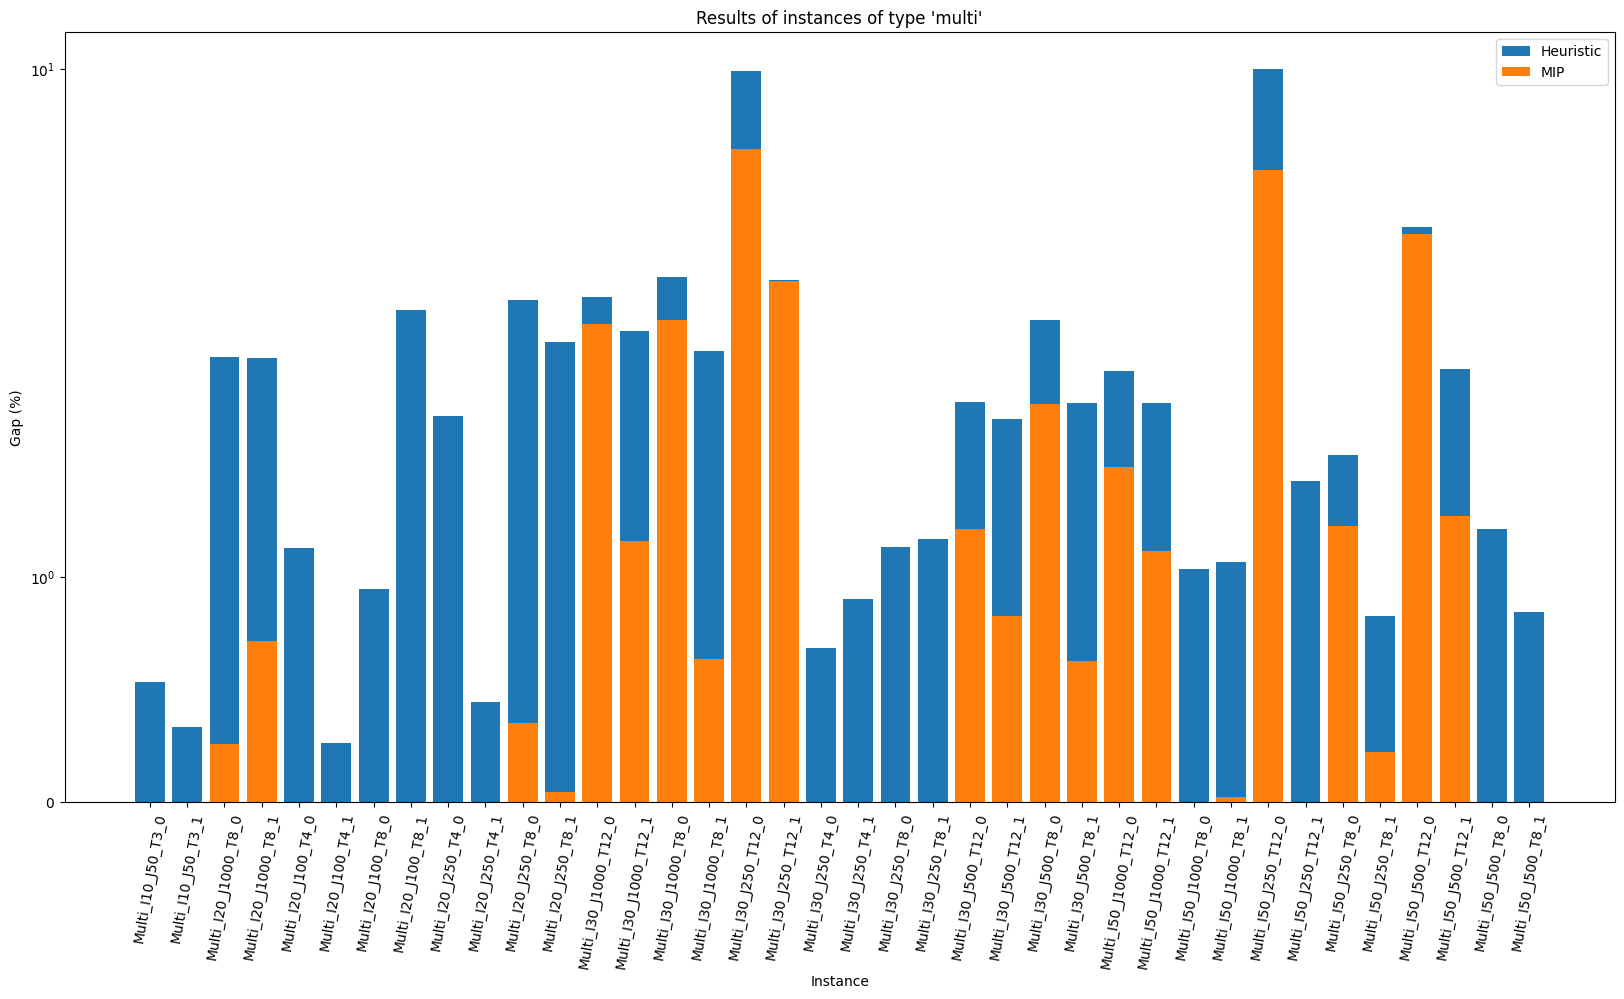

In [10]:
plot_results(multi_h_results, multi_mip_results, "Results of instances of type 'multi'")

In [11]:
def list_to_latex_array(data, title):
    # Initialize the result string
    result = "\\begin{table}[h]\n"
    result += "\\begin{center}\n"
    result += "\\begin{tabular}{|p{5cm}|c|c|c|}\n"
    result += "\\hline\n"
    result += "\\textbf{Instance} & \\textbf{Runtime (sec)} & \\textbf{Obj. Value} & \\textbf{Gap (\%)} \\\\\n" + "\\hline\n"
    # Iterate over the rows of the data
    for row in data:
        if row[3] <= 0.0001:
            row[0] = "\\textbf{" + row[0] + "}"
        # Iterate over the elements of the row and add them to the result string
        for element in row:
            # If the element is a string, enclose it in quotation marks
            if isinstance(element, str):
                result += element.replace("_", "\_") + " & "
            # Otherwise, just convert it to a string and add it to the result string
            else:
                if element <= 0.0001:
                    result += "\\textbf{"+ str(element) + "} & "
                else:
                    result += str(element) + " & "
        # Remove the last " & " and add a newline character
        result = result[:-2] + " \\\\\n"

    # Close the array
    result += "\\hline\n" + "\\end{tabular}\n"
    result += "\\end{center}\n"
    result += "\\caption{" + title + "}\n"
    result += "\\label{tab:" + title + "}\n"
    result += "\\end{table}\n"
    return result


In [12]:
print(list_to_latex_array(single_h_results, "Results of instances of type 'single' for the heuristic"))

\begin{table}[h]
\begin{center}
\begin{tabular}{|p{5cm}|c|c|c|}
\hline
\textbf{Instance} & \textbf{Runtime (sec)} & \textbf{Obj. Value} & \textbf{Gap (\%)} \\
\hline
Single\_I10\_J50\_T3\_0 & \textbf{0.0} & 23484 & 1.2008  \\
Single\_I10\_J50\_T3\_1 & \textbf{0.0} & 24301 & 0.6913  \\
Single\_I20\_J1000\_T8\_0 & 0.18 & 548961 & 5.8013  \\
Single\_I20\_J1000\_T8\_1 & 0.17 & 529254 & 3.5657  \\
Single\_I20\_J100\_T4\_0 & 0.01 & 45097 & 1.3748  \\
Single\_I20\_J100\_T4\_1 & \textbf{0.0} & 44157 & 1.6419  \\
Single\_I20\_J100\_T8\_0 & 0.02 & 81883 & 2.1812  \\
Single\_I20\_J100\_T8\_1 & 0.02 & 80797 & 1.8924  \\
Single\_I20\_J250\_T4\_0 & 0.01 & 87633 & 1.7847  \\
Single\_I20\_J250\_T4\_1 & 0.01 & 90916 & 3.0259  \\
Single\_I20\_J250\_T8\_0 & 0.04 & 161142 & 4.4366  \\
Single\_I20\_J250\_T8\_1 & 0.04 & 156920 & 2.7931  \\
Single\_I30\_J1000\_T12\_0 & 0.47 & 776119 & 5.7209  \\
Single\_I30\_J1000\_T12\_1 & 0.48 & 793688 & 128.7386  \\
Single\_I30\_J1000\_T8\_0 & 0.21 & 535028 & 6.9304  \\
S

In [13]:
print(list_to_latex_array(multi_h_results, "Results of instances of type 'multi' for the heuristic"))

\begin{table}[h]
\begin{center}
\begin{tabular}{|p{5cm}|c|c|c|}
\hline
\textbf{Instance} & \textbf{Runtime (sec)} & \textbf{Obj. Value} & \textbf{Gap (\%)} \\
\hline
Multi\_I10\_J50\_T3\_0 & \textbf{0.0} & 34509 & 0.5332  \\
Multi\_I10\_J50\_T3\_1 & \textbf{0.0} & 36641 & 0.333  \\
Multi\_I20\_J1000\_T8\_0 & 0.19 & 731218 & 1.976  \\
Multi\_I20\_J1000\_T8\_1 & 0.2 & 807798 & 1.9723  \\
Multi\_I20\_J100\_T4\_0 & 0.01 & 68701 & 1.1295  \\
Multi\_I20\_J100\_T4\_1 & 0.01 & 108776 & 0.2611  \\
Multi\_I20\_J100\_T8\_0 & 0.02 & 127679 & 0.9453  \\
Multi\_I20\_J100\_T8\_1 & 0.02 & 116535 & 2.5307  \\
Multi\_I20\_J250\_T4\_0 & 0.01 & 112459 & 1.7144  \\
Multi\_I20\_J250\_T4\_1 & 0.02 & 232129 & 0.4438  \\
Multi\_I20\_J250\_T8\_0 & 0.05 & 235372 & 2.6865  \\
Multi\_I20\_J250\_T8\_1 & 0.05 & 209595 & 2.1174  \\
Multi\_I30\_J1000\_T12\_0 & 0.54 & 1007963 & 2.7325  \\
Multi\_I30\_J1000\_T12\_1 & 0.59 & 1224115 & 2.248  \\
Multi\_I30\_J1000\_T8\_0 & 0.23 & 716045 & 3.0629  \\
Multi\_I30\_J1000\_T8\_

In [14]:
print(list_to_latex_array(single_mip_results, "Results of instances of type 'single' for the MIP"))

\begin{table}[h]
\begin{center}
\begin{tabular}{|p{5cm}|c|c|c|}
\hline
\textbf{Instance} & \textbf{Runtime (sec)} & \textbf{Obj. Value} & \textbf{Gap (\%)} \\
\hline
\textbf{Single\_I10\_J50\_T3\_0} & 0.14 & 23202 & \textbf{0.0}  \\
\textbf{Single\_I10\_J50\_T3\_1} & 0.12 & 24133 & \textbf{0.0}  \\
Single\_I20\_J1000\_T8\_0 & 290.56 & 531134 & 2.5539  \\
Single\_I20\_J1000\_T8\_1 & 283.29 & 517860 & 1.4129  \\
\textbf{Single\_I20\_J100\_T4\_0} & 3.22 & 44477 & \textbf{0.0}  \\
\textbf{Single\_I20\_J100\_T4\_1} & 4.82 & 43432 & \textbf{0.0}  \\
\textbf{Single\_I20\_J100\_T8\_0} & 212.0 & 80097 & \textbf{0.0}  \\
\textbf{Single\_I20\_J100\_T8\_1} & 21.98 & 79268 & \textbf{0.0}  \\
\textbf{Single\_I20\_J250\_T4\_0} & 211.2 & 86069 & \textbf{0.0}  \\
\textbf{Single\_I20\_J250\_T4\_1} & 108.68 & 88165 & \textbf{0.0}  \\
Single\_I20\_J250\_T8\_0 & 300.01 & 156867 & 1.7837  \\
Single\_I20\_J250\_T8\_1 & 300.2 & 153778 & 0.7908  \\
Single\_I30\_J1000\_T12\_0 & 300.01 & 764049 & 4.1657  \\
Sing

In [15]:
print(list_to_latex_array(multi_mip_results, "Results of instances of type 'multi' for the MIP"))

\begin{table}[h]
\begin{center}
\begin{tabular}{|p{5cm}|c|c|c|}
\hline
\textbf{Instance} & \textbf{Runtime (sec)} & \textbf{Obj. Value} & \textbf{Gap (\%)} \\
\hline
\textbf{Multi\_I10\_J50\_T3\_0} & 0.24 & 34325 & \textbf{0.0}  \\
\textbf{Multi\_I10\_J50\_T3\_1} & 0.14 & 36519 & \textbf{0.0}  \\
Multi\_I20\_J1000\_T8\_0 & 269.39 & 718670 & 0.26  \\
Multi\_I20\_J1000\_T8\_1 & 284.8 & 797646 & 0.7156  \\
\textbf{Multi\_I20\_J100\_T4\_0} & 0.51 & 67925 & \textbf{0.0}  \\
\textbf{Multi\_I20\_J100\_T4\_1} & 0.32 & 108492 & \textbf{0.0}  \\
\textbf{Multi\_I20\_J100\_T8\_0} & 5.89 & 126472 & \textbf{0.0}  \\
\textbf{Multi\_I20\_J100\_T8\_1} & 23.27 & 113586 & \textbf{0.0001}  \\
\textbf{Multi\_I20\_J250\_T4\_0} & 50.92 & 110531 & \textbf{0.0}  \\
\textbf{Multi\_I20\_J250\_T4\_1} & 2.44 & 231099 & \textbf{0.0001}  \\
Multi\_I20\_J250\_T8\_0 & 300.02 & 229872 & 0.3498  \\
Multi\_I20\_J250\_T8\_1 & 300.03 & 205247 & 0.0429  \\
Multi\_I30\_J1000\_T12\_0 & 278.87 & 1004033 & 2.3426  \\
Multi\_I30